In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_66311_R')

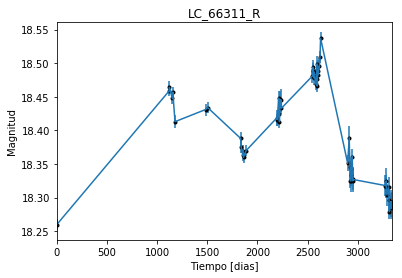

In [2]:
data = np.genfromtxt('LC_66311_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_66311_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

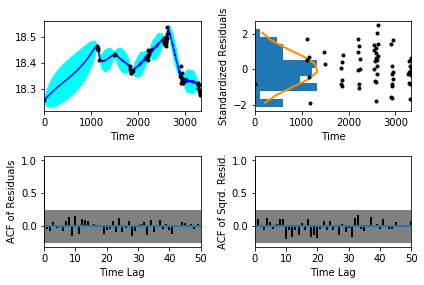

In [5]:
sample.assess_fit()

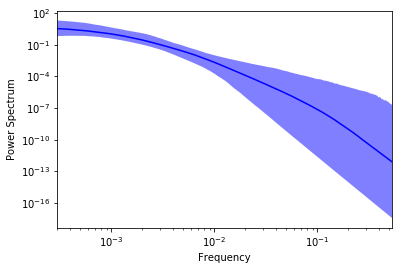

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_66311_R')

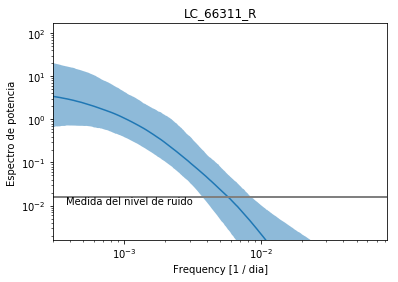

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_66311_R')

Text(0.5,1,'Prediccion , valor esperado LC_66311_R')

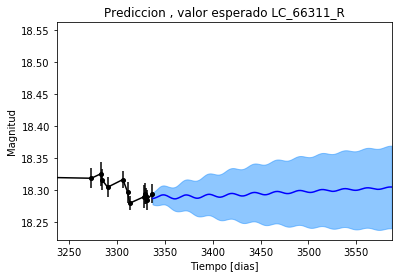

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_66311_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_66311_R')

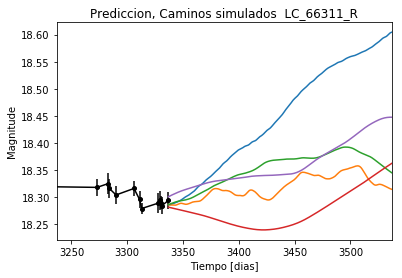

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_66311_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_66311_R')

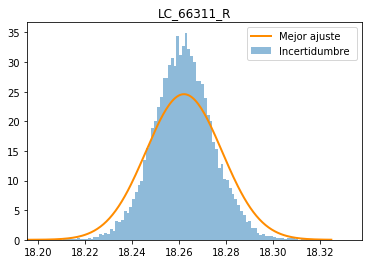

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_66311_R')

Text(0.5,1,'Interpolacion, camino simulado LC_66311_R')

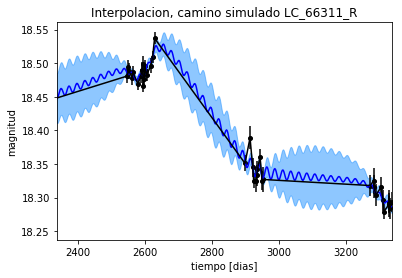

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66311_R')

Text(0.5,1,'Interpolacion, camino simulado LC_66311_R')

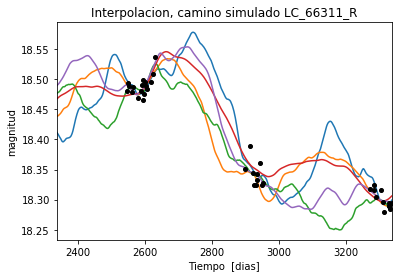

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66311_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1252.7187897
Median: 0.0207492150306
Standard deviation: 0.231456348636
68% credibility interval: [ 0.00153949  0.30118994]
95% credibility interval: [  3.98037578e-04   8.73674224e-01]
99% credibility interval: [  3.18216250e-04   1.00874416e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1162.001018
Median: 0.00265969450303
Standard deviation: 0.0758047171337
68% credibility interval: [ 0.00052792  0.02690075]
95% credibility interval: [ 0.00032387  0.22530796]
99% credibility interval: [  3.06062392e-04   5.32443348e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 323.883432061
Median: 0.0142426264353
Standard dev

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1062.73394875
Median: 179.607859719
Standard deviation: 1.74032723318
68% credibility interval: [ 177.61685951  180.84306868]
95% credibility interval: [ 174.92387587  181.51273959]
99% credibility interval: [ 172.66691794  181.9553741 ]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 772.231779738
Median: 0.791040017182
Standard deviation: 2.37147460721
68% credibility interval: [ 0.06061238  4.24411698]
95% credibility interval: [ 0.01727727  8.19827581]
99% credibility interval: [  1.08452714e-02   1.12843163e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1627.59146106
Median: 0.505105708275
Standard deviation: 9.17284014612
68% credibility interval: [ 0.03579003  8.18951086]
95% credibility interval: [  2.1

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 9870.79108771
Median: 2.29542798537e-41
Standard deviation: 1.21487094147e+52
68% credibility interval: [  3.47799915e-87   1.57959700e-11]
95% credibility interval: [  1.81392922e-164   3.63358751e+008]
99% credibility interval: [  5.48978208e-170   8.46255163e+031]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2040.9111896
Median: 18.3784707617
Standard deviation: 0.0478430466817
68% credibility interval: [ 18.33488688  18.41945158]
95% credibility interval: [ 18.27862902  18.4683656 ]
99% credibility interval: [ 18.22122172  18.51681675]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 389.947695606
Median: 0.00490380666976
Standard deviation: 0.240572898415
68% credibility interval: [ 0.        0.317494]
95% credibility interval: [ 0.          0.90934226]
99% credibility interval: [ 0.          1.04868359]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 389.947695606
Median: 0.00490380666976
Standard deviation: 0.240572898415
68% credibility interval: [ 0.        0.317494]
95% credibility interval: [ 0.          0.90934226]
99% credibility interval: [ 0.          1.04868359]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1051.23046128
Median: 0.0
Standard deviation: 0.000424824093249
68% credibil

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1062.73394875
Median: 179.607859719
Standard deviation: 1.74032723318
68% credibility interval: [ 177.61685951  180.84306868]
95% credibility interval: [ 174.92387587  181.51273959]
99% credibility interval: [ 172.66691794  181.9553741 ]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1304.4773333
Median: 0.00757318006073
Standard deviation: 0.0100158851949
68% credibility interval: [ 0.00458276  0.01446223]
95% credibility interval: [ 0.00301537  0.03331525]
99% credibility interval: [ 0.00247072  0.06210874]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 940.648597565
Median: 1.08343765058
Standard deviation: 0.184978970524
68% credibility interval: [ 0.91559318  1.27836253]
95% credibility interval: [ 0.77880129  1.49395637]
99% credibility interval: [ 0.69910398  1.67048863]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 522.581422051
Median: 0.000103983463165
Standard deviation: 0.0374923772717
68% credibility interval: [  4.03433769e-06   2.47003285e-03]
95% credibility interval: [  1.03590092e-12   7.27154330e-02]
99% credibility interval: [  1.41216587e-36   2.61132260e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1252.7187897
Median: (-0.130371163016-0.428691785319j)
Standard deviation: 2.09756178684
68% credibility interval: [-1.89243218+0.j         -0.00967293-1.36784978j]
95% credibility interval: [ -5.48945705e+00+0.j          -2.50094386e-03-0.04470262j]
99% credibility interval: [ -6.33812646e+00+0.j         -1.99941167e-03-0.0341214j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1162.001018
Median: (-0.016711353423+0.0368093035225j)
Standard deviation: 1.58482902491
68% credibility interval: [-0.16902241+6.60347774j -0.00331702+0.j        ]
95% credibility interval: [-1.41565168+3.2480253j -0.00203491+0.j       ]
99% credibility interval: [ -3.34544022e+00+2.45794251j  -1.92304672e-03+0.j        ]
Posterior summary fo